### Линейная алгебра: сходство текстов и аппроксимация функций

## Задача 1: сравнение предложений

In [252]:
with open('sentences.txt') as file:
# приводим к нижнему регистру и удаляем перевод строк ("\n")
    sentences = file.readlines()
    file.seek(0) # вернули каретку на 0 символ
    text = [sentence.lower().strip() for sentence in sentences] 

In [253]:
text[:2]

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.']

In [254]:
import re

In [255]:
tokenized_list = [re.split("[^a-z]", sentence) for sentence in text]
# чистим результат от пустых значений
tokenized_text = []
for sentence in tokenized_list:
    tokenized_text += [word for word in sentence if word]

In [256]:
print(f'Общее количество слов: {len(tokenized_text)}')
# только уникальные слова
unique = list(set(tokenized_text))
print(f'Уникальные слова: {len(unique)}')

Общее количество слов: 484
Уникальные слова: 254


In [257]:
# Составьте список всех слов, встречающихся в предложениях.
# Сопоставьте каждому слову индекс от нуля до (d - 1), 
# где d — число различных слов в предложениях.
words = {unique[i]:i for i in range(len(unique))}
print(words)

{'arguments': 0, 'read': 1, 'lines': 2, 'are': 3, 'every': 4, 'year': 5, 'selection': 6, 'adjacent': 7, 'an': 8, 'legibility': 9, 'artificial': 10, 'enhancements': 11, 'entirely': 12, 'piped': 13, 'starting': 14, 'delete': 15, 'were': 16, 'unnecessary': 17, 'safer': 18, 'information': 19, 'world': 20, 'diploid': 21, 'can': 22, 'single': 23, 'keyboards': 24, 'for': 25, 'type': 26, 'features': 27, 'streams': 28, 'releases': 29, 'more': 30, 'left': 31, 'switch': 32, 'closest': 33, 'dogs': 34, 'so': 35, 'vermin': 36, 'deliberately': 37, 'mac': 38, 'second': 39, 'comparison': 40, 'symbol': 41, 'release': 42, 'available': 43, 'os': 44, 'won': 45, 'running': 46, 'be': 47, 'error': 48, 'tiger': 49, 'leopard': 50, 'community': 51, 'kg': 52, 'between': 53, 's': 54, 'permanently': 55, 'over': 56, 'upgrade': 57, 'cat': 58, 'common': 59, 'too': 60, 'predators': 61, 'factory': 62, 'terms': 63, 'domesticated': 64, 'installed': 65, 'major': 66, 'new': 67, 'released': 68, 'disk': 69, 'july': 70, 'domes

In [258]:
import numpy as np

In [265]:
# матрица размера n * d, где n — число предложений
d = len(sentences)
n = len(unique)
matrix = np.zeros((d, n))
matrix.shape

for j_word in words:
    for i_sent in range(d):
        matrix[i_sent][words.get(j_word)] = tokenized_list[i_sent].count(j_word)

matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [266]:
from scipy.spatial import distance

In [273]:
result = {n : distance.cosine(matrix[0], matrix[n]) for n in range(d)}

result = sorted(result.items(), key=lambda x: x[1], reverse=False)
n1, n2 = result[1][0], result[2][0]

In [274]:
n1, n2

(6, 4)

In [275]:
with open('result.txt', 'w') as f:
    f.write(f'{n1} {n2}')

!cat result.txt

6 4

## Задача 2: аппроксимация функции

In [1]:
import numpy as np
from matplotlib import pylab as plt
from jupyterthemes import jtplot

%matplotlib inline

jtplot.style()

In [20]:
#  Рассмотрим сложную математическую функцию на отрезке [1, 15]:
#  f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

origin_x = np.arange(1,  16)
origin_y = np.array(f(x))

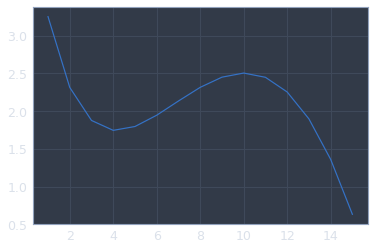

In [22]:
plt.plot(origin_x,origin_y)

In [32]:
# задайте матрицу коэффициентов A и свободный вектор b
# для многочлена первой степени,
# который должен совпадать с функцией f в точках 1 и 15.
matrix_A = np.array([[1, 1],
                     [1, 15]])
vector_b = np.array(list(map(f, [1, 15])))

result_1 = np.linalg.solve(matrix_A, vector_b)
result_1

array([ 3.43914511, -0.18692825])

In [44]:
# найдем координаты
x1 = [1, 15]
y1 = np.polynomial.polynomial.polyval(x1, result_1, tensor=True)

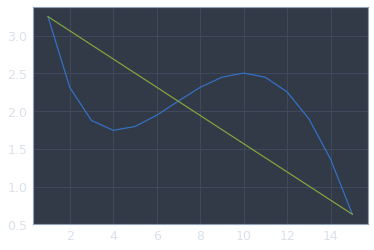

In [45]:
plt.plot(origin_x,origin_y)
plt.plot(x1,y1)

Вопрос: Хорошо ли он приближает исходную функцию?

Ответ: нет

In [39]:
# Повторите те же шаги для многочлена второй степени,
# который совпадает с функцией f в точках 1, 8 и 15.
matrix_A = np.array([[1, 1, 1],
                     [1, 8, 8**2],
                     [1, 15, 15**2]])
vector_b = np.array(list(map(f, [1, 8, 15])))

result_2 = np.linalg.solve(matrix_A, vector_b)
result_2

array([ 3.32512949, -0.06531159, -0.00760104])

In [47]:
# найдем координаты
x2 = [1, 8, 15]
y2 = np.polynomial.polynomial.polyval(x2, result_2, tensor=True)

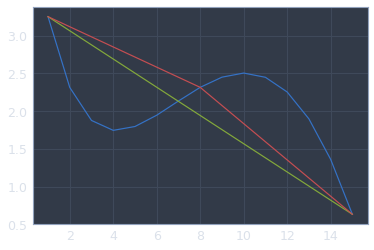

In [48]:
plt.plot(origin_x,origin_y)
plt.plot(x1,y1)
plt.plot(x2,y2)

Вопрос: Улучшилось ли качество аппроксимации?

Ответ: Незначительно.

In [41]:
matrix_A = np.array([[1, 1, 1, 1],
                     [1, 4, 4**2, 4**3],
                     [1, 10, 10**2, 10**3],
                     [1, 15, 15**2, 15**3]])
vector_b = np.array(list(map(f, [1, 4, 10, 15])))

result_3 = np.linalg.solve(matrix_A, vector_b)
result_3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [50]:
# найдем координаты
x3 = [1, 4, 10, 15]
y3 = np.polynomial.polynomial.polyval(x3, result_3, tensor=True)

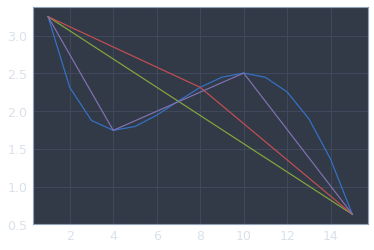

In [51]:
plt.plot(origin_x,origin_y)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)

Вопрос: Хорошо ли он аппроксимирует функцию?

Ответ: Достаточно(?)

In [54]:
with open('submission-2.txt', 'w') as file:
    file.write(' '.join([f'{i:.2f}' for i in result_3]))

In [55]:
!cat submission-2.txt

4.36 -1.30 0.19 -0.01